In [43]:
import torch
from torchvision import datasets, transforms
import helper
from torch import nn
import torch.nn.functional as F
from torch import optim
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import helper

In [44]:
# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])
# Download and load the training data
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

In [55]:
#Define the model
input_size = 784
hidden_sizes = [256,128,64]
output_size = 10

model = nn.Sequential(nn.Linear(input_size,hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Dropout(0.2),
                      nn.Linear(hidden_sizes[0],hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Dropout(0.2),
                      nn.Linear(hidden_sizes[1],hidden_sizes[2]),
                      nn.ReLU(),
                      nn.Dropout(0.2),
                      nn.Linear(hidden_sizes[2],output_size),
                      nn.LogSoftmax(dim=1))


#Define criterion and optimizer

criterion = nn.CrossEntropyLoss()

optimizer = optim.SGD(model.parameters(),lr=0.003)

In [56]:
#Train the network


epochs = 5
train_losses , test_losses = [] , []

for e in range(epochs):
    
    running_loss=0
    
    for images,labels in trainloader:
        
        images = images.view(images.shape[0],-1)
        optimizer.zero_grad()
        output= model.forward(images)
        loss=criterion(output,labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    
    else:

        #Validation Implementation
        test_loss = 0
        accuracy = 0
    
        with torch.no_grad():

            model.eval()

            for images, labels in testloader:

                images = images.view(images.shape[0],-1)
                log_ps = model(images)
                test_loss+= criterion(log_ps,labels)
                ps = torch.exp(model(images))
                top_p, top_class = ps.topk(1, dim=1)
                equals = top_class == labels.view(*top_class.shape)
                accuracy+= torch.mean(equals.type(torch.FloatTensor))

        model.train()
        train_losses.append(running_loss/len(trainloader))
        test_losses.append(test_loss/len(testloader))
        
        print("Epoch: {}/{}.. ".format(e+1, epochs),
              "Training Loss: {:.3f}.. ".format(running_loss/len(trainloader)),
              "Test Loss: {:.3f}.. ".format(test_loss/len(testloader)),
              "Test Accuracy: {:.3f}".format(accuracy/len(testloader)))

Epoch: 1/5..  Training Loss: 2.185..  Test Loss: 1.848..  Test Accuracy: 0.300
Epoch: 2/5..  Training Loss: 1.468..  Test Loss: 1.065..  Test Accuracy: 0.667
Epoch: 3/5..  Training Loss: 1.056..  Test Loss: 0.842..  Test Accuracy: 0.716
Epoch: 4/5..  Training Loss: 0.891..  Test Loss: 0.743..  Test Accuracy: 0.735
Epoch: 5/5..  Training Loss: 0.802..  Test Loss: 0.688..  Test Accuracy: 0.745


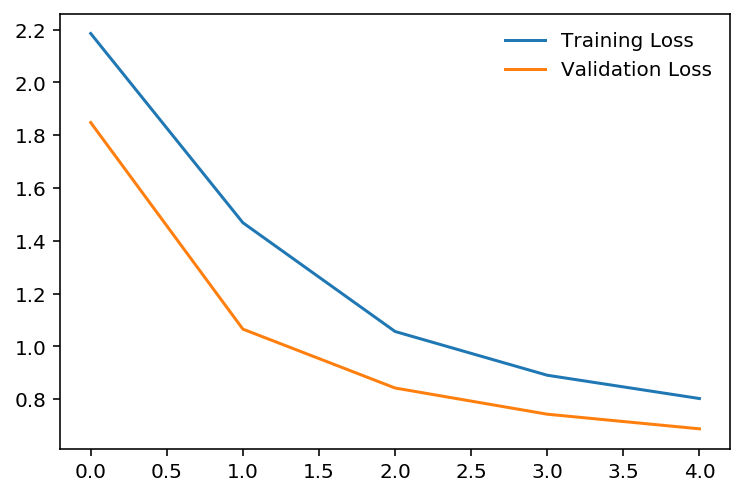

In [60]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

import matplotlib.pyplot as pyplot

plt.plot(train_losses, label = 'Training Loss')
plt.plot(test_losses, label = 'Validation Loss')
plt.legend(frameon = False)

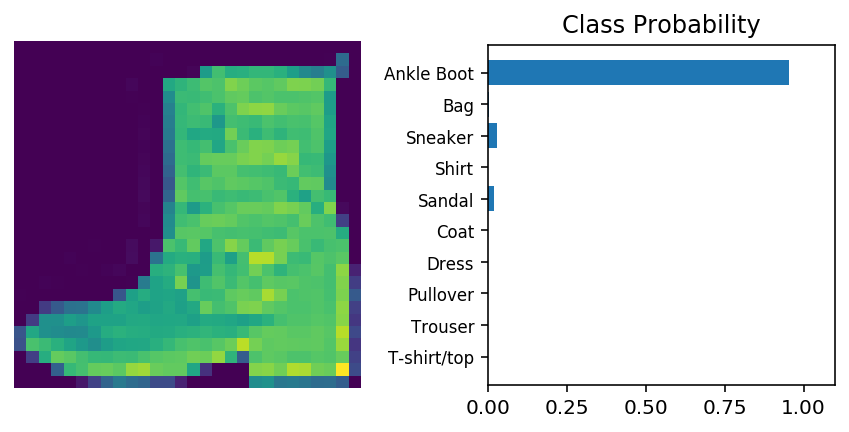

In [62]:
# Test out your network!

dataiter = iter(testloader)
images, labels = dataiter.next()
img = images[0]
# Convert 2D image to 1D vector
img = img.resize_(1, 784)

# Calculate the class probabilities (softmax) for img

ps = torch.exp(model(img))
S
# Plot the image and probabilities
helper.view_classify(img.resize_(1, 28, 28), ps, version='Fashion')